<a href="https://colab.research.google.com/github/onurkasap/tensor/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

keras'tan mnist datasetini çektik.

In [1]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


normalizasyon

In [2]:
x_train = x_train / 255.0
x_test = x_test / 255.0

model oluşturma aşaması

In [3]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


modeli derleyelim

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

.fit ile model eğitelim

In [5]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8772 - loss: 0.4380
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9640 - loss: 0.1230
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9768 - loss: 0.0768
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9823 - loss: 0.0580
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9867 - loss: 0.0421


model testi:

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test doğruluk oranı:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9742 - loss: 0.0825
Test doğruluk oranı: 0.9771999716758728


tahmin ve sonuçlar

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


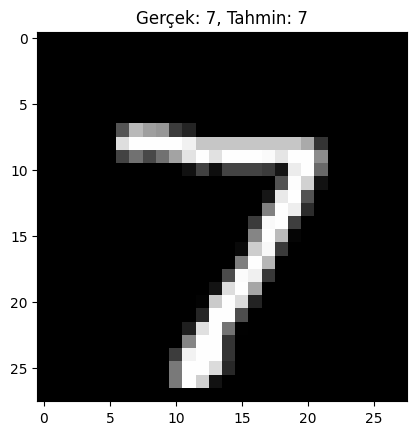

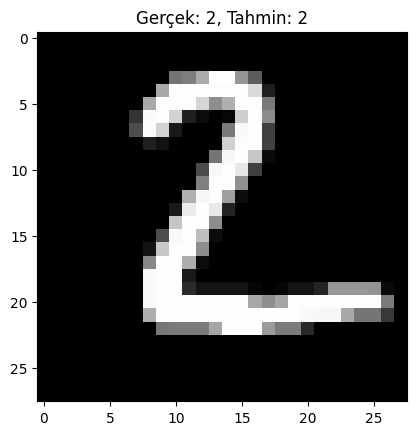

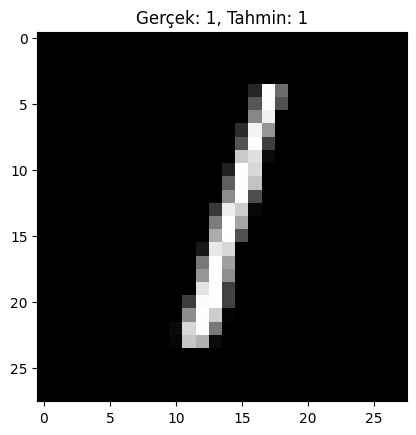

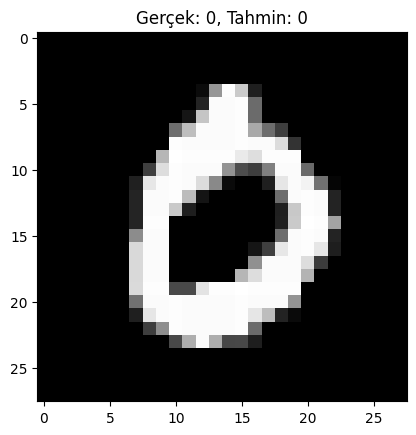

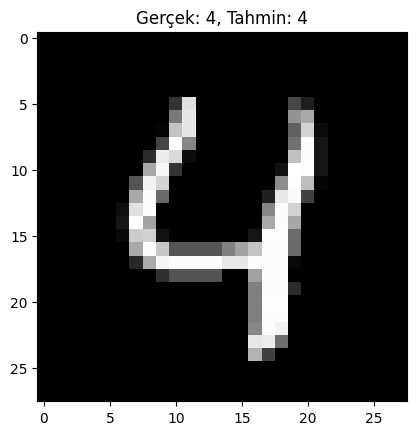

In [7]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test)
# İlk 5 örneği çizelim
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Gerçek: {y_test[i]}, Tahmin: {np.argmax(predictions[i])}")
    plt.show()